# Intro to Data Science and SQL

data source: [ravelry.com](https://www.ravelry.com/)

data: info on 3000 patterns for hats, sweaters, and hand accessories

# Setup
- enabling extensions
- importing needed libraries
- creating the database from the files
- establishing a connection

In [17]:
%load_ext sql
# interacting with a SQLite database
import sqlite3
# data analysis
import pandas as pd
# visualization
import matplotlib

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [7]:
# create db
conn = sqlite3.connect("yarn.db")

# import the data files to db
sweater_data = pd.read_csv("sweaters")
sweater_data.to_sql(
    "patterns",
    conn,
    if_exists="replace"
)

hat_data = pd.read_csv("hats")
hat_data.to_sql(
    "patterns",
    conn,
    if_exists="append"
)

hand_data = pd.read_csv("hands")
hand_data.to_sql(
    "patterns",
    conn,
    if_exists="append"
)

# connect to db to use SQL directly
%sql sqlite:///yarn.db

# Intro to SQL

## Database structure
- we have three data tables: `sweaters`, `hats`, and `hands`
- each of those tables has 10 columns

In [3]:
# PRAGMA is a way to query non-table data in sqlite
# these kinds of commands differ between database solutions

# check table list
%sql PRAGMA table_list;

 * sqlite:///yarn.db
Done.


schema,name,type,ncol,wr,strict
main,patterns,table,10,0,0
main,sqlite_schema,table,5,0,0
temp,sqlite_temp_schema,table,5,0,0


In [4]:
# check a data table schema
%sql PRAGMA table_info(patterns);

 * sqlite:///yarn.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Name,TEXT,0,None,0
2,Parent_category,TEXT,0,None,0
3,Craft,TEXT,0,None,0
4,Yarn_weight,TEXT,0,None,0
5,Yardage,REAL,0,None,0
6,Gauge,REAL,0,None,0
7,Price,REAL,0,None,0
8,Currency,TEXT,0,None,0
9,Parent_category_id,INTEGER,0,None,0


## Exploring data with SQL
### SELECTing data

In [ ]:
# getting all the data from a table
# this is too much data to display in the notebook
%sql SELECT * FROM patterns;

 * sqlite:///yarn.db
Done.


In [7]:
# limiting the number of results
%sql SELECT * FROM patterns LIMIT 5;

 * sqlite:///yarn.db
Done.


index,Name,Parent_category,Craft,Yarn_weight,Yardage,Gauge,Price,Currency,Parent_category_id
0,The Basketweaver Sweater,Sweater,Knitting,DK,900.0,20.0,6.0,EUR,319
1,smoking,Sweater,Knitting,DK,1170.0,21.0,6.7,EUR,319
2,Carlisle (Saddle),Sweater,Knitting,Fingering,1340.0,25.0,7.0,USD,319
3,Carlisle (Raglan),Sweater,Knitting,Fingering,1340.0,25.0,7.0,USD,319
4,Bohemian Scrapsody,Sweater,Knitting,Aran,1121.0,14.0,9.0,CAD,319


In [8]:
# selecting specific columns
%sql SELECT Name, Craft FROM patterns LIMIT 5;

 * sqlite:///yarn.db
Done.


Name,Craft
The Basketweaver Sweater,Knitting
smoking,Knitting
Carlisle (Saddle),Knitting
Carlisle (Raglan),Knitting
Bohemian Scrapsody,Knitting


In [9]:
# selecting data that meets a specific condition
%sql SELECT * FROM patterns WHERE Craft="Crochet" LIMIT 5;

 * sqlite:///yarn.db
Done.


index,Name,Parent_category,Craft,Yarn_weight,Yardage,Gauge,Price,Currency,Parent_category_id
15,Button up Cable sweater,Sweater,Crochet,DK,547.0,17.0,4.99,USD,319
36,Dewdrops Cardigan,Sweater,Crochet,Worsted,328.0,8.0,5.5,USD,319
41,Virkattu PAITAMEKKO,Sweater,Crochet,Aran,1203.0,16.0,5.0,EUR,319
43,Whoopa CAL,Sweater,Crochet,Bulky,875.0,11.0,8.5,USD,319
53,Festive Scrap Yarn Sweater,Sweater,Crochet,Bulky,1200.0,3.5,None,None,319


In [10]:
# selecting data that meets multiple conditions
%sql SELECT * FROM patterns WHERE Price>1 AND PRICE <5 AND Currency="USD" LIMIT 5;

 * sqlite:///yarn.db
Done.


index,Name,Parent_category,Craft,Yarn_weight,Yardage,Gauge,Price,Currency,Parent_category_id
15,Button up Cable sweater,Sweater,Crochet,DK,547.0,17.0,4.99,USD,319
77,Lightweight Cardigan,Sweater,Knitting,DK,273.0,22.0,4.0,USD,319
180,Cashmere Cardigan,Sweater,Crochet,DK,390.0,18.0,3.5,USD,319
309,Hitofude Cardigan,Sweater,Knitting,Fingering,730.0,20.0,2.0,USD,319
0,Hot Dish Hat,Hat,Knitting,Aran,300.0,18.0,4.0,USD,411


In [11]:
# selecting distinct values
%sql SELECT DISTINCT Yarn_weight FROM patterns;

 * sqlite:///yarn.db
Done.


Yarn_weight
DK
Fingering
Aran
Sport
None
Worsted
Bulky
Lace
Super Bulky
Any gauge


### Aggregate functions

In [12]:
# count the number of rows that match a condition
%sql SELECT COUNT() FROM patterns WHERE Craft="Knitting";

 * sqlite:///yarn.db
Done.


COUNT()
2828


In [13]:
# calculate the average over a value
%sql SELECT AVG(Yardage) FROM patterns;

 * sqlite:///yarn.db
Done.


AVG(Yardage)
460.39073083778965


In [14]:
# count group members
%sql SELECT Parent_category, COUNT() FROM patterns GROUP BY Parent_category;

 * sqlite:///yarn.db
Done.


Parent_category,COUNT()
Hands,996
Hat,975
Neck / Torso,21
Other Headwear,4
Sweater,1004


In [15]:
# average group members
%sql SELECT Parent_category, AVG(Yardage) FROM patterns GROUP BY Parent_category;

 * sqlite:///yarn.db
Done.


Parent_category,AVG(Yardage)
Hands,177.0056179775281
Hat,173.22378378378377
Neck / Torso,415.4736842105263
Other Headwear,120.25
Sweater,998.1944157187177


# Exploratory data analysis

There are a number of statistical metrics that allow us to understand the data. We're going to focus on measures of shape, that describe the distribution (pattern) of the data.

The most common distribution metrics are:
- mean - sum of values over count
- median (p50) - middle point of the distribution
- mode - most common value in the distribution
- p25, p75, p90, p95, p99 - values at specific percentiles of the distribution

We're going to both calculate the measures and visualize our distrubutions, to get a sense of how our data looks and examine some initial hypotheses.

## Hypothesis 1: Sweaters require more yardage

In [13]:
# getting yardage data into a pandas data frame
select_yardage = %sql SELECT Yardage FROM patterns;
yardage_df = select_yardage.DataFrame()

# caculating mean
yardage_df.mean()

 * sqlite:///yarn.db
Done.


Yardage    460.390731
dtype: float64

In [ ]:
# describing the dataframe 
yardage_df.describe()

array([[<AxesSubplot: title={'center': 'Yardage'}>]], dtype=object)

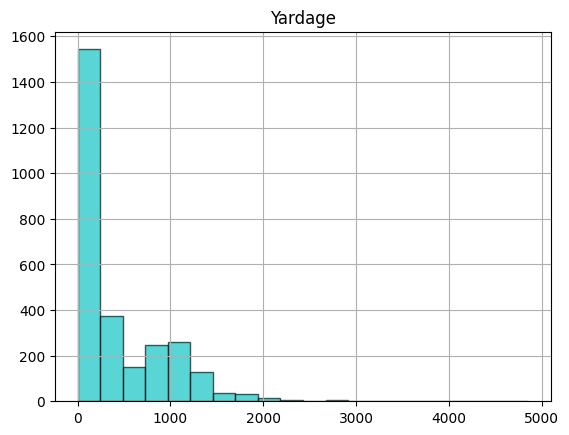

In [21]:
yardage_df.hist(color='c', bins=20, edgecolor='k', alpha=0.65)

In [31]:
# getting yardage data into a pandas data frame
yardage_by_category =%sql SELECT Parent_category, Yardage FROM patterns;
yardage_by_category_df = yardage_by_category.DataFrame()

yardage_by_category_df.head()

 * sqlite:///yarn.db
Done.


,Parent_category,Yardage
0,Sweater,900.0
1,Sweater,1170.0
2,Sweater,1340.0
3,Sweater,1340.0
4,Sweater,1121.0


In [33]:
yardage_by_category_df.groupby('Parent_category').describe()

Yardage                                                        \
                  count        mean         std    min     25%    50%     75%   
Parent_category                                                                 
Hands             890.0  177.005618  101.126684    0.0  109.00  160.0   219.0   
Hat               925.0  173.223784  112.750811    0.0  100.00  150.0   210.0   
Neck / Torso       19.0  415.473684  362.877140   70.0  120.50  301.0   540.5   
Other Headwear      4.0  120.250000   78.223505   64.0   81.25   90.5   129.5   
Sweater           967.0  998.194416  471.111084  109.0  734.00  979.0  1203.0   

                         
                    max  
Parent_category          
Hands            1035.0  
Hat               960.0  
Neck / Torso     1181.0  
Other Headwear    236.0  
Sweater          4856.0

Parent_category
Hands             [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Hat               [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Neck / Torso      [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Other Headwear    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Sweater           [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

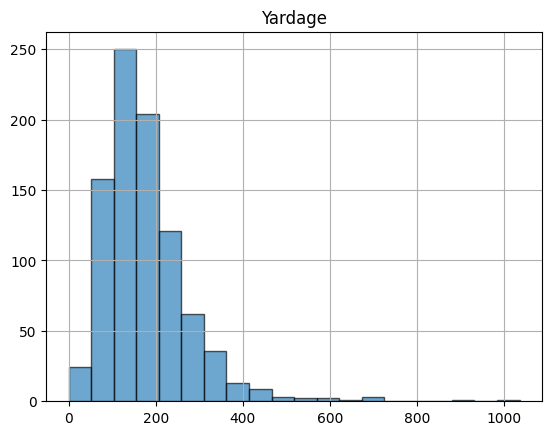

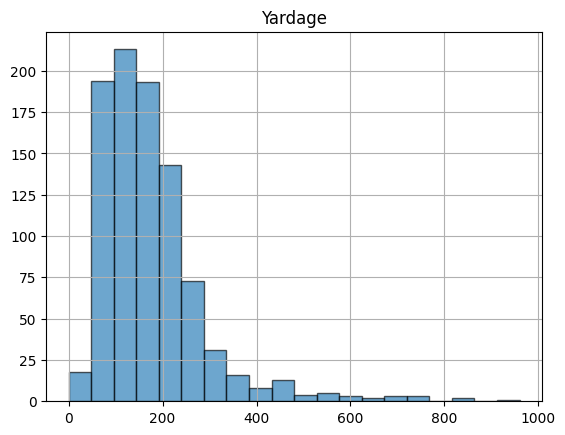

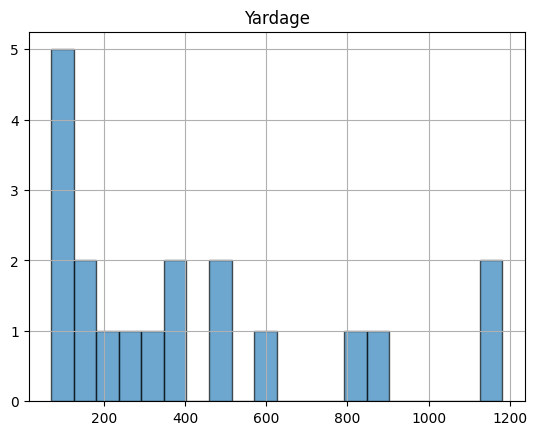

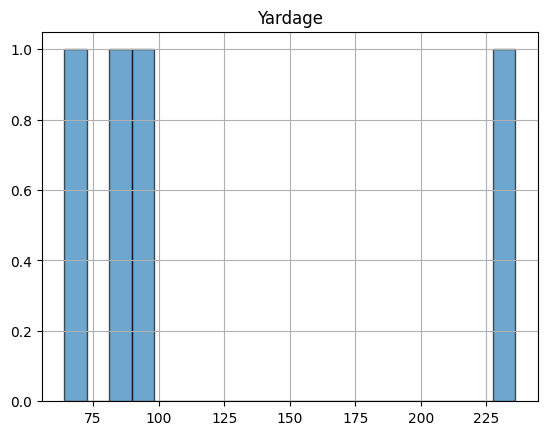

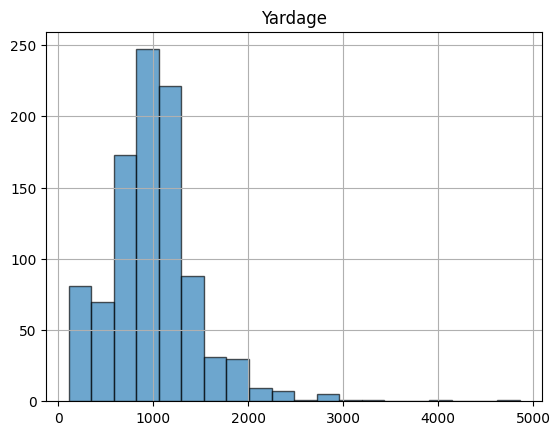

In [39]:
yardage_by_category_df.groupby('Parent_category').hist(bins=20, edgecolor='k', alpha=0.65)

Parent_category
Hands             AxesSubplot(0.125,0.11;0.775x0.77)
Hat               AxesSubplot(0.125,0.11;0.775x0.77)
Neck / Torso      AxesSubplot(0.125,0.11;0.775x0.77)
Other Headwear    AxesSubplot(0.125,0.11;0.775x0.77)
Sweater           AxesSubplot(0.125,0.11;0.775x0.77)
Name: Yardage, dtype: object

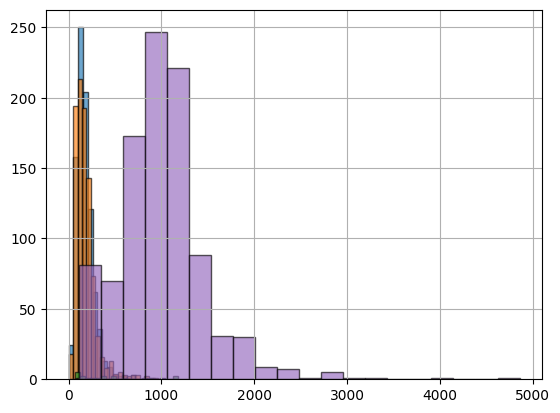

In [38]:
yardage_by_category_df.groupby('Parent_category')['Yardage'].hist(bins=20, edgecolor='k', alpha=0.65)

### Conclusion
Preliminary data exploration does not disprove the hypothesis that sweaters require more yardage.

## Hypothesis 2: Crochet requires more yardage

In [41]:
# getting yardage data into a pandas data frame
yardage_by_craft =%sql SELECT Craft, Yardage FROM patterns;
yardage_by_craft_df = yardage_by_craft.DataFrame()

yardage_by_craft_df.groupby('Craft').describe()

 * sqlite:///yarn.db
Done.


Yardage                                                \
                   count        mean         std    min     25%    50%   
Craft                                                                    
Crochet            143.0  369.321678  434.713093   30.0  115.00  190.0   
Knitting          2658.0  465.740783  489.672265    0.0  130.25  219.0   
Loom Knitting        1.0  110.000000         NaN  110.0  110.00  110.0   
Machine Knitting     3.0  178.000000   93.530744   70.0  151.00  232.0   

                                  
                     75%     max  
Craft                             
Crochet           350.00  1856.0  
Knitting          796.75  4856.0  
Loom Knitting     110.00   110.0  
Machine Knitting  232.00   232.0

### Conclusion
There is insufficient data in the dataset to compare crochet and knitting yardage.

## Hypothesis 3: Yardage and yarn weight are correlated

This is where we get into a bit of trouble with data quality. While yarn weights are standardized, it's more of a set of overlapping ranges than a strict standard.

The weight of yarn can be defined as:
- number of plies
- wraps per inch
- knit gauge
- crochet gauge
- standard names (which differ between countries)

We have two measures in the dataset - categorical `Yarn_weight` and numerical `Gauge`. Let's explore `Yarn_weight` first.

In [44]:
# getting yardage data into a pandas data frame
yardage_by_weight =%sql SELECT Yarn_weight, Gauge, Yardage FROM patterns;
yardage_by_weight_df = yardage_by_weight.DataFrame()

yardage_by_weight_df.groupby('Yarn_weight')['Yardage'].describe()

 * sqlite:///yarn.db
Done.


,count,mean,std,min,25%,50%,75%,max
Yarn_weight,,,,,,,,
Any gauge,26.0,192.923077,278.151315,34.0,80.0,100.0,178.75,1312.0
Aran,295.0,396.169492,396.965632,35.0,120.0,190.0,693.50,1800.0
Aran / Worsted,1.0,120.000000,NaN,120.0,120.0,120.0,120.00,120.0
Bulky,194.0,401.108247,534.362284,35.0,100.0,130.0,593.75,3281.0
Cobweb,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DK,701.0,510.523538,489.101218,0.0,150.0,252.0,850.00,2843.0
Fingering,521.0,510.846449,466.206160,5.0,186.0,273.0,850.00,2770.0
Jumbo,1.0,96.000000,NaN,96.0,96.0,96.0,96.00,96.0
Lace,17.0,777.941176,576.018497,1.0,328.0,705.0,1039.00,2187.0


In [46]:
yardage_by_weight_df.groupby('Yarn_weight')['Yardage'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Yarn_weight,,,,,,,,
Jumbo,1.0,96.000000,NaN,96.0,96.0,96.0,96.00,96.0
Aran / Worsted,1.0,120.000000,NaN,120.0,120.0,120.0,120.00,120.0
Super Bulky,126.0,133.841270,242.105445,30.0,65.0,79.0,90.00,2400.0
Any gauge,26.0,192.923077,278.151315,34.0,80.0,100.0,178.75,1312.0
Aran,295.0,396.169492,396.965632,35.0,120.0,190.0,693.50,1800.0
Bulky,194.0,401.108247,534.362284,35.0,100.0,130.0,593.75,3281.0
Worsted,571.0,423.560420,506.815605,0.0,125.0,183.0,695.00,4856.0
DK,701.0,510.523538,489.101218,0.0,150.0,252.0,850.00,2843.0
Fingering,521.0,510.846449,466.206160,5.0,186.0,273.0,850.00,2770.0


In [47]:
# since it was a bit inconclusive, let's only take sweaters into account
sweater_yardage_by_weight =%sql SELECT Yarn_weight, Gauge, Yardage FROM patterns WHERE Parent_category = 'Sweater';
sweater_yardage_by_weight_df = sweater_yardage_by_weight.DataFrame()

sweater_yardage_by_weight_df.groupby('Yarn_weight')['Yardage'].describe().sort_values('mean')

 * sqlite:///yarn.db
Done.


,count,mean,std,min,25%,50%,75%,max
Yarn_weight,,,,,,,,
Super Bulky,12.0,665.500000,566.118764,320.0,380.00,515.5,660.75,2400.0
Aran,86.0,947.581395,288.223992,220.0,791.75,950.5,1094.00,1800.0
DK,293.0,958.607509,457.201186,120.0,689.00,930.0,1170.00,2843.0
Worsted,183.0,984.759563,566.597205,150.0,711.00,940.0,1149.00,4856.0
Lace,12.0,1023.250000,502.179998,250.0,698.25,945.5,1332.50,2187.0
Fingering,183.0,1026.289617,421.116032,200.0,799.00,1039.0,1271.50,2770.0
Bulky,59.0,1028.033898,601.817648,109.0,700.00,875.0,1127.00,3281.0
Light Fingering,27.0,1068.629630,496.128639,250.0,777.50,1087.0,1284.50,2432.0
Any gauge,2.0,1093.500000,309.005663,875.0,984.25,1093.5,1202.75,1312.0


We could try and calculate the correlation between the categorical `Yarn_weight` metric and continuous `Yardage` - but that wouldn't necessarily be statistically sound. Since yarn weights can overlap and there is no guarantee each category differs from the previous one by a constant measure (e.g. each category is 2x thick as the previous one), we're on shaky ground.

Let's look at the continuous metric for `Gauge` and see its correlation with `Yardage`.

_Note: How do we interpret `Gauge`?
Gauge is number of stitches per inch in a 4x4inch square. The thicker the yarn, the less stitches will there be in a square. So the higher the gauge value, the lower the yarn weight.

_Note: What's correlation?_
Correlation measures whether there is a relationship between two variables, how strong in is, and which direction it goes. The most common correlation metric measures it on a scale from `-1` to `1`, where:
- `0` - no correlation
- `1` - strong positive correlation (if metric `x` goes up by `1`, so does metric `y`)
- `-1` - strong negative correlation (if metric `x` goes up by `1`, metric `y` goes down by `1`)

Usually correlation between two metrics is somewhere in-between.

In [52]:
# let's take a look at the gauge column first
yardage_by_weight_df['Gauge'].describe()

count    2797.000000
mean       20.381695
std         6.950796
min         0.000000
25%        17.000000
50%        20.000000
75%        24.000000
max        57.000000
Name: Gauge, dtype: float64

<AxesSubplot: >

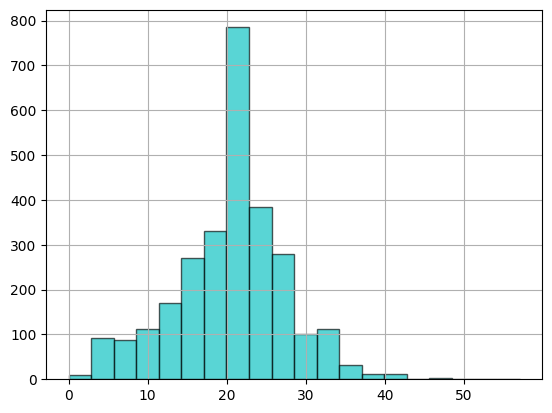

In [53]:
yardage_by_weight_df['Gauge'].hist(color='c', bins=20, edgecolor='k', alpha=0.65)

In [54]:
# calculate correlation
yardage_by_weight_df['Yardage'].corr(yardage_by_weight_df['Gauge'])

0.026392746295259773

In [55]:
# let's check it for sweaters only
sweater_yardage_by_weight_df['Yardage'].corr(yardage_by_weight_df['Gauge'])

0.10878614560240595

### Conclusion
Preliminary data exploration suggests there might be a small negative correlation between yarn weight and yardage (meaning - the lighter the yarn, the higher the yardage), but the results are pretty inconclusive.

## Hypothesis 4: Sweater patterns cost more

In [56]:
# first, we need to do some currency conversions
%sql SELECT DISTINCT Currency FROM patterns;

 * sqlite:///yarn.db
Done.


Currency
EUR
USD
CAD
None
GBP
DKK
SEK
NOK
JPY
SGD


In [66]:
# let's define currency conversion rates
currency = pd.DataFrame({
    "Currency": ["USD", "EUR", "CAD", "GBP", "DKK", "SEK", "NOK", "JPY", "SGD", "AUD", "NZD", "PLN", "CHF", "HRK"],
    "Conversion_rate": [1, 0.92, 1.34, 0.83, 6.9, 10.55, 10.15, 131.18, 1.32, 1.44, 1.58, 4.37, 0.93, 6.98]
})

In [68]:
# getting price data into a pandas data frame
pattern_cost = %sql SELECT Price, Currency, Parent_category FROM patterns;
pattern_cost_df = pattern_cost.DataFrame()

pattern_cost_df.groupby('Currency')['Price'].describe()

 * sqlite:///yarn.db
Done.


,count,mean,std,min,25%,50%,75%,max
Currency,,,,,,,,
AUD,13.0,6.692308,2.470985,3.00,5.0000,7.00,8.000,11.00
CAD,135.0,8.224667,2.964325,0.00,7.0000,8.00,9.875,29.95
CHF,9.0,5.611111,1.635118,4.00,4.0000,5.50,6.500,9.00
DKK,154.0,43.564935,6.840790,25.00,45.0000,45.00,45.000,60.00
EUR,462.0,5.834394,1.694882,0.00,4.9000,5.90,7.000,15.90
GBP,173.0,5.359769,1.115084,3.00,4.8000,5.45,6.000,9.00
HRK,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JPY,12.0,662.500000,185.870189,360.00,500.0000,715.00,800.000,880.00
NOK,62.0,49.564516,16.936352,10.00,40.0000,50.00,59.000,95.00


In [69]:
%sql SELECT Price, Currency, Parent_category FROM patterns WHERE Currency = 'HRK';

 * sqlite:///yarn.db
Done.


Price,Currency,Parent_category
None,HRK,Hands
None,HRK,Hands


In [72]:
# let's only grab patterns that have a price
pattern_cost_with_price = %sql SELECT Price, Currency, Parent_category FROM patterns WHERE Price > 0;
pattern_cost_with_price_df = pattern_cost_with_price.DataFrame()

pattern_cost_with_price_df.groupby('Currency')['Price'].describe()

 * sqlite:///yarn.db
Done.


,count,mean,std,min,25%,50%,75%,max
Currency,,,,,,,,
AUD,13.0,6.692308,2.470985,3.00,5.0000,7.00,8.0000,11.00
CAD,134.0,8.286045,2.888059,1.50,7.0000,8.00,9.9375,29.95
CHF,9.0,5.611111,1.635118,4.00,4.0000,5.50,6.5000,9.00
DKK,154.0,43.564935,6.840790,25.00,45.0000,45.00,45.0000,60.00
EUR,461.0,5.847050,1.674726,0.90,4.9000,5.90,7.0000,15.90
GBP,173.0,5.359769,1.115084,3.00,4.8000,5.45,6.0000,9.00
JPY,12.0,662.500000,185.870189,360.00,500.0000,715.00,800.0000,880.00
NOK,62.0,49.564516,16.936352,10.00,40.0000,50.00,59.0000,95.00
NZD,4.0,7.747500,3.867173,1.99,7.2475,9.50,10.0000,10.00


In [74]:
# we need a new column, USD_converted_price

# let's take a look at what we're joining
pattern_cost_with_price_df.head()

,Price,Currency,Parent_category
0,6.0,EUR,Sweater
1,6.7,EUR,Sweater
2,7.0,USD,Sweater
3,7.0,USD,Sweater
4,9.0,CAD,Sweater


In [103]:
currency.head()

,Currency,Conversion_rate
0,USD,1.00
1,EUR,0.92
2,CAD,1.34
3,GBP,0.83
4,DKK,6.90


In [114]:
# merge on Currency
pattern_cost_in_USD_df = pattern_cost_with_price_df.merge(currency, on="Currency")
pattern_cost_in_USD_df.head()

,Price,Currency,Parent_category,Conversion_rate
0,6.0,EUR,Sweater,0.92
1,6.7,EUR,Sweater,0.92
2,5.5,EUR,Sweater,0.92
3,6.0,EUR,Sweater,0.92
4,5.0,EUR,Sweater,0.92


In [115]:
# add a new column with the converted price
pattern_cost_in_USD_df['USD_converted_price'] = pattern_cost_in_USD_df['Price'] / pattern_cost_in_USD_df['Conversion_rate']
pattern_cost_in_USD_df.head()

,Price,Currency,Parent_category,Conversion_rate,USD_converted_price
0,6.0,EUR,Sweater,0.92,6.521739
1,6.7,EUR,Sweater,0.92,7.282609
2,5.5,EUR,Sweater,0.92,5.978261
3,6.0,EUR,Sweater,0.92,6.521739
4,5.0,EUR,Sweater,0.92,5.434783


In [116]:
# finally, we can check the price difference per pattern category
pattern_cost_in_USD_df.groupby('Parent_category')['USD_converted_price'].describe()

,count,mean,std,min,25%,50%,75%,max
Parent_category,,,,,,,,
Hands,614.0,5.516955,1.838941,0.985222,4.477612,5.500000,6.024096,22.350746
Hat,616.0,5.580904,1.418332,0.978261,4.819277,5.783357,6.250000,12.000000
Neck / Torso,17.0,7.304384,3.170229,2.173913,5.970149,6.989247,7.500000,17.282609
Other Headwear,4.0,6.207831,1.180533,5.000000,5.750000,6.000000,6.457831,7.831325
Sweater,892.0,7.561871,1.523074,2.000000,6.521739,7.462687,8.000000,30.000000


Parent_category
Hands             AxesSubplot(0.125,0.11;0.775x0.77)
Hat               AxesSubplot(0.125,0.11;0.775x0.77)
Neck / Torso      AxesSubplot(0.125,0.11;0.775x0.77)
Other Headwear    AxesSubplot(0.125,0.11;0.775x0.77)
Sweater           AxesSubplot(0.125,0.11;0.775x0.77)
Name: USD_converted_price, dtype: object

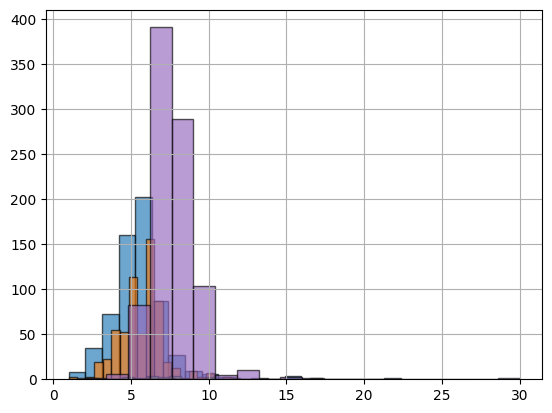

In [117]:
# and visualize
pattern_cost_in_USD_df.groupby('Parent_category')['USD_converted_price'].hist(bins=20, edgecolor='k', alpha=0.65)

### Conclusion
Initial data exploration doesn't disprove the hypothesis that sweater patterns are on average more expensive.